# Preprocessing ISIC Dataset
## 1. Training Data
### 1.1. Imports and load ground truth 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from matplotlib import pyplot as plt

semeion_data = pd.read_csv('semeion.data', delimiter=' ', header=None, na_values=[''])
print(semeion_data.shape)



(1593, 267)


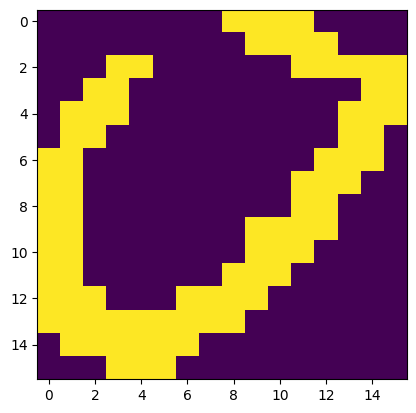

In [2]:
def getImg(num, data):
    imgArray = []
    for i in range(256):
        imgArray = np.append(imgArray, data[i][num])
    
    imgArray = imgArray.reshape(16,16)

    return imgArray

Img2 = getImg(19,semeion_data)

plt.imshow(Img2)
plt.show()
plt.close()
    

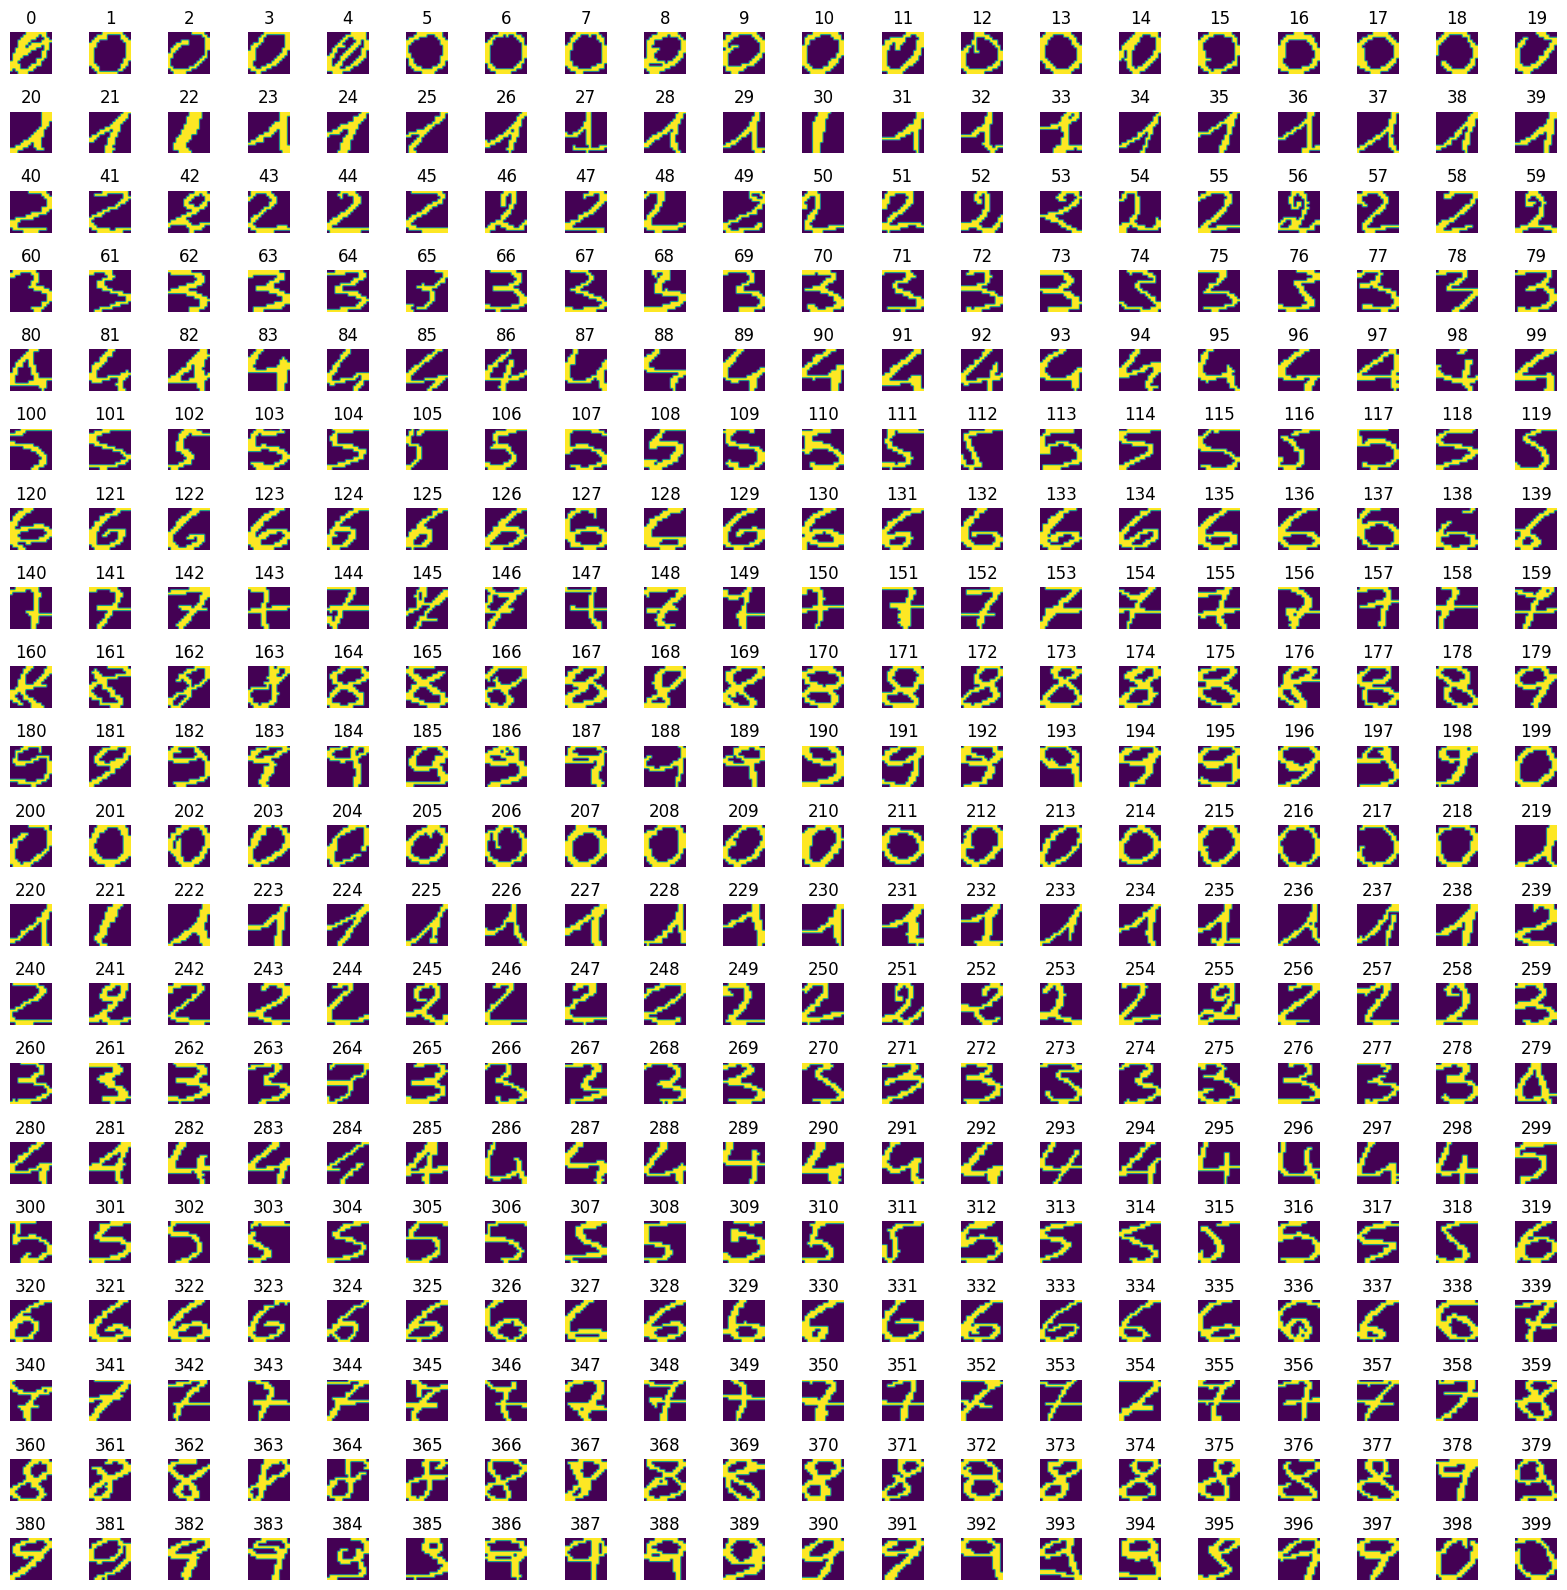

In [3]:
def bigImgArray(begin, end, data):
    bigImgArray = []
    for n in range(begin, end):
        array = getImg(n,data)
        imgArray = np.array(array)
        bigImgArray.append(imgArray)

    bigImgArray = np.array(bigImgArray)
    return bigImgArray

imgdata = bigImgArray(0,1593,semeion_data)

fig = plt.figure(figsize=(16, 16))

columns = 20
rows = 20
for i in range(0, 400):
    img = imgdata[i]
    ax = fig.add_subplot(rows, columns, i+1)
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(i)
plt.tight_layout()
plt.show()

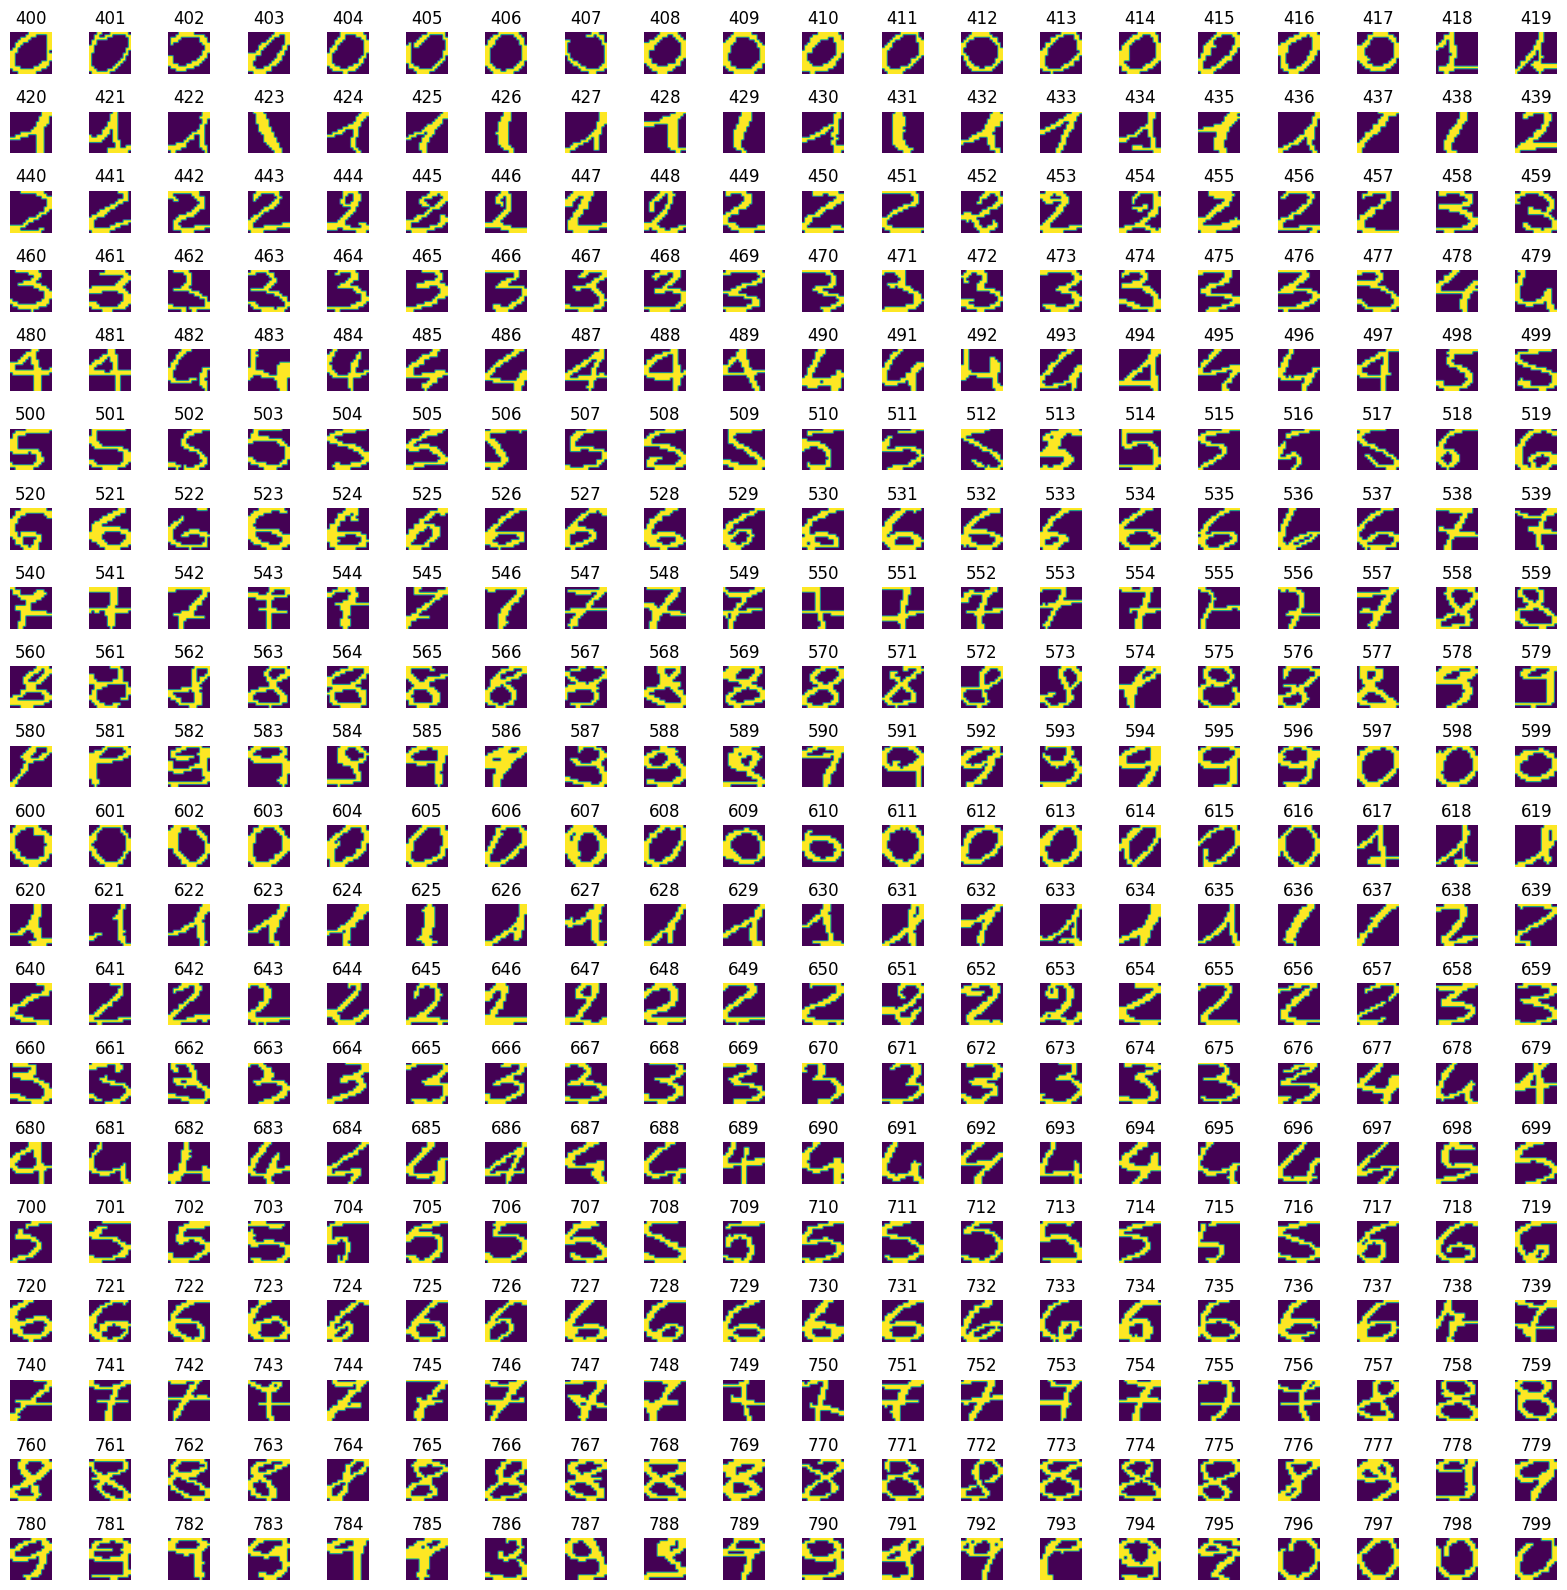

In [4]:
fig = plt.figure(figsize=(16, 16))

columns = 20
rows = 20
for i in range(400, 800):
    img = imgdata[i]
    ax = fig.add_subplot(rows, columns, i-399)
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(i)
plt.tight_layout()
plt.show()

In [5]:
gt = []

toDelete = [179, 378, 597, 677, 717, 757, 796]
extra = [ 636, 696, 736]
counter= 0
for c in range(4):
    for i in range(10):
        for n in range(20):
            if np.isin(counter, toDelete) :
                counter = counter + 1
            elif np.isin(counter, extra) :
                gt = np.append(gt, i)
                gt = np.append(gt, i)
                counter = counter + 2
            else:
                gt = np.append(gt, i)
                counter = counter + 1


print (gt[697])

4.0


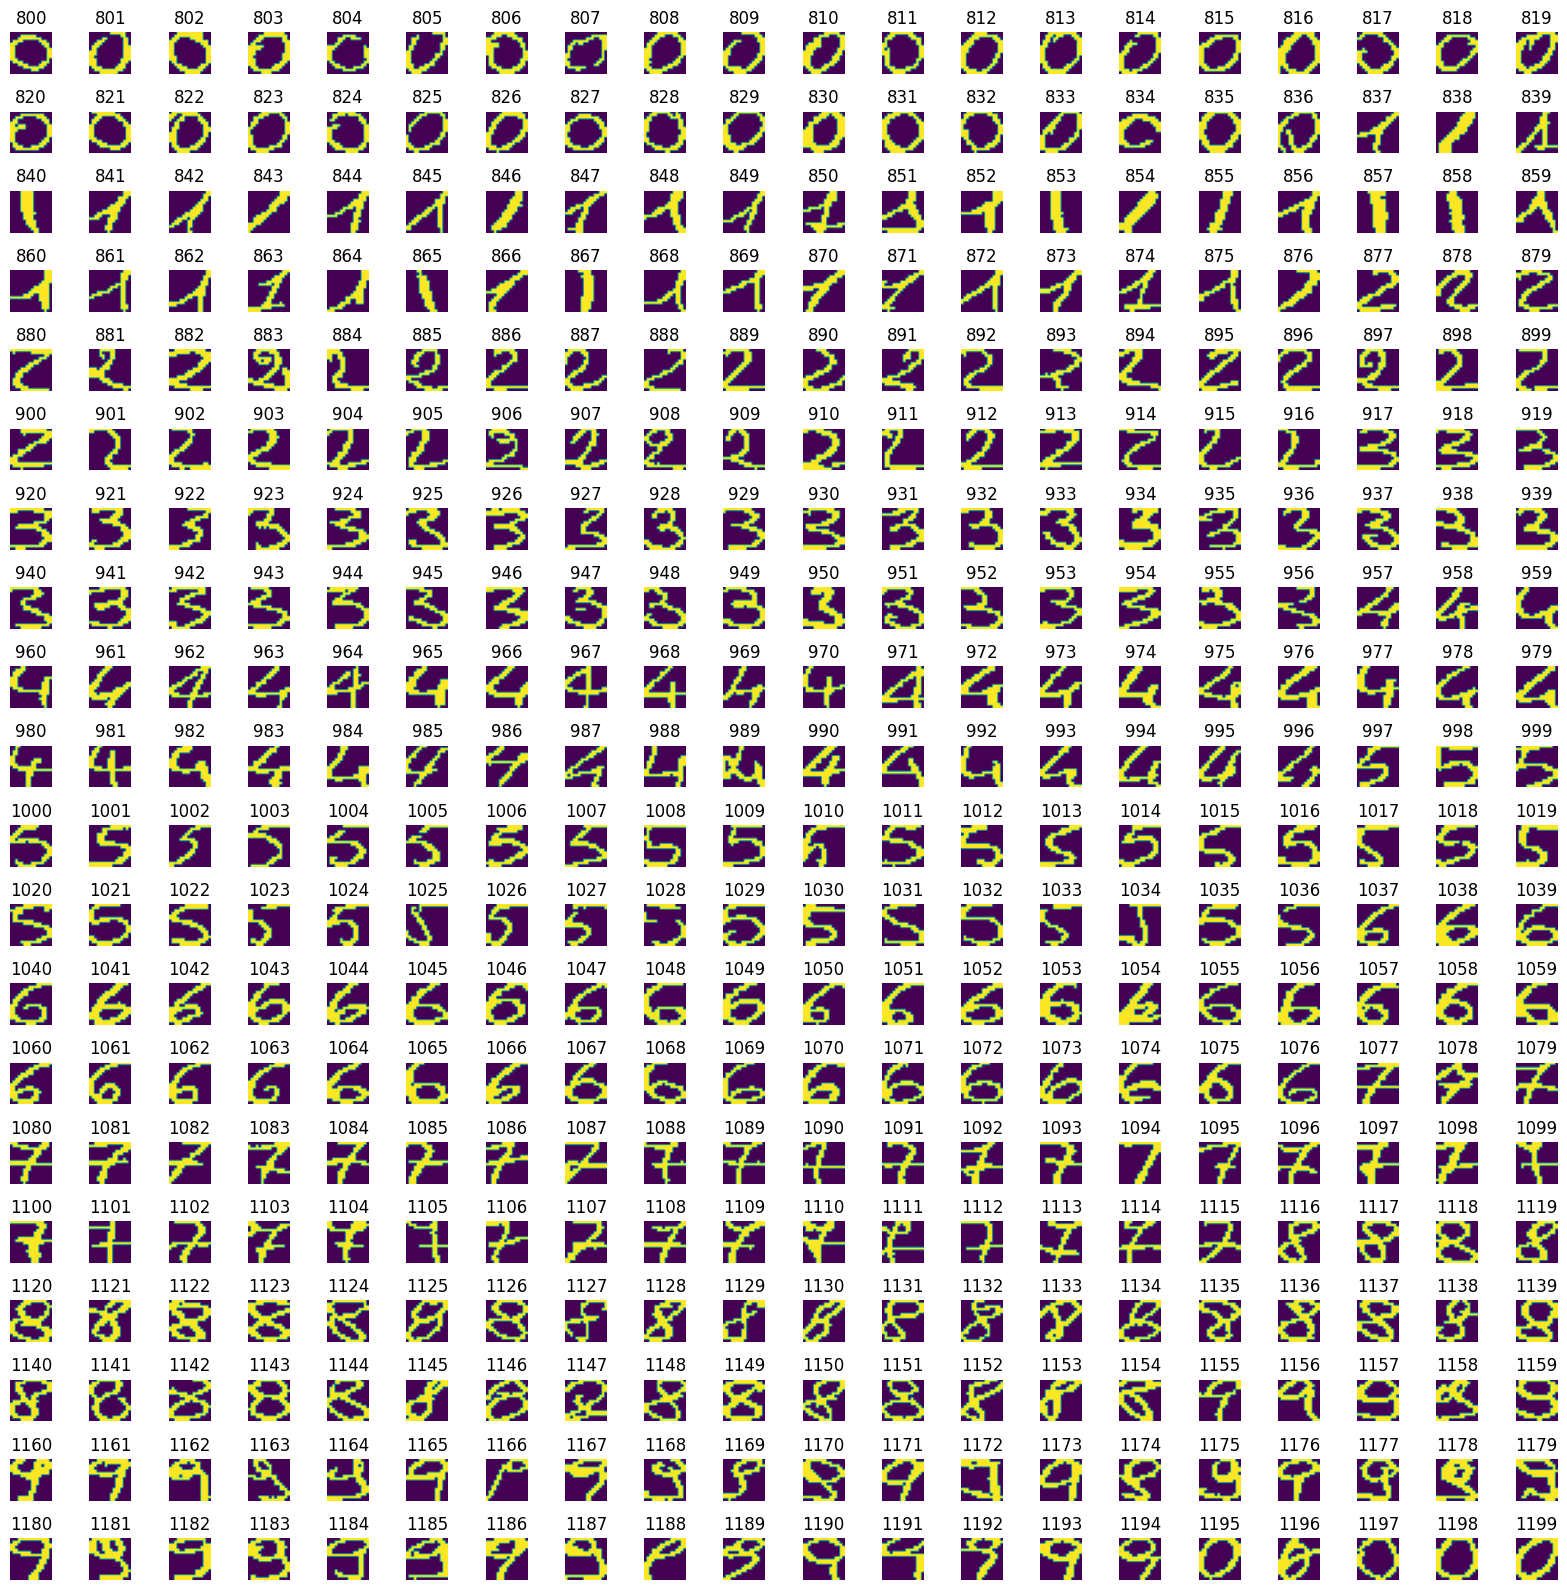

In [6]:
fig = plt.figure(figsize=(16, 16))

columns = 20
rows = 20
for i in range(800, 1200):
    img = imgdata[i]
    ax = fig.add_subplot(rows, columns, i-799)
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(i)
plt.tight_layout()
plt.show()

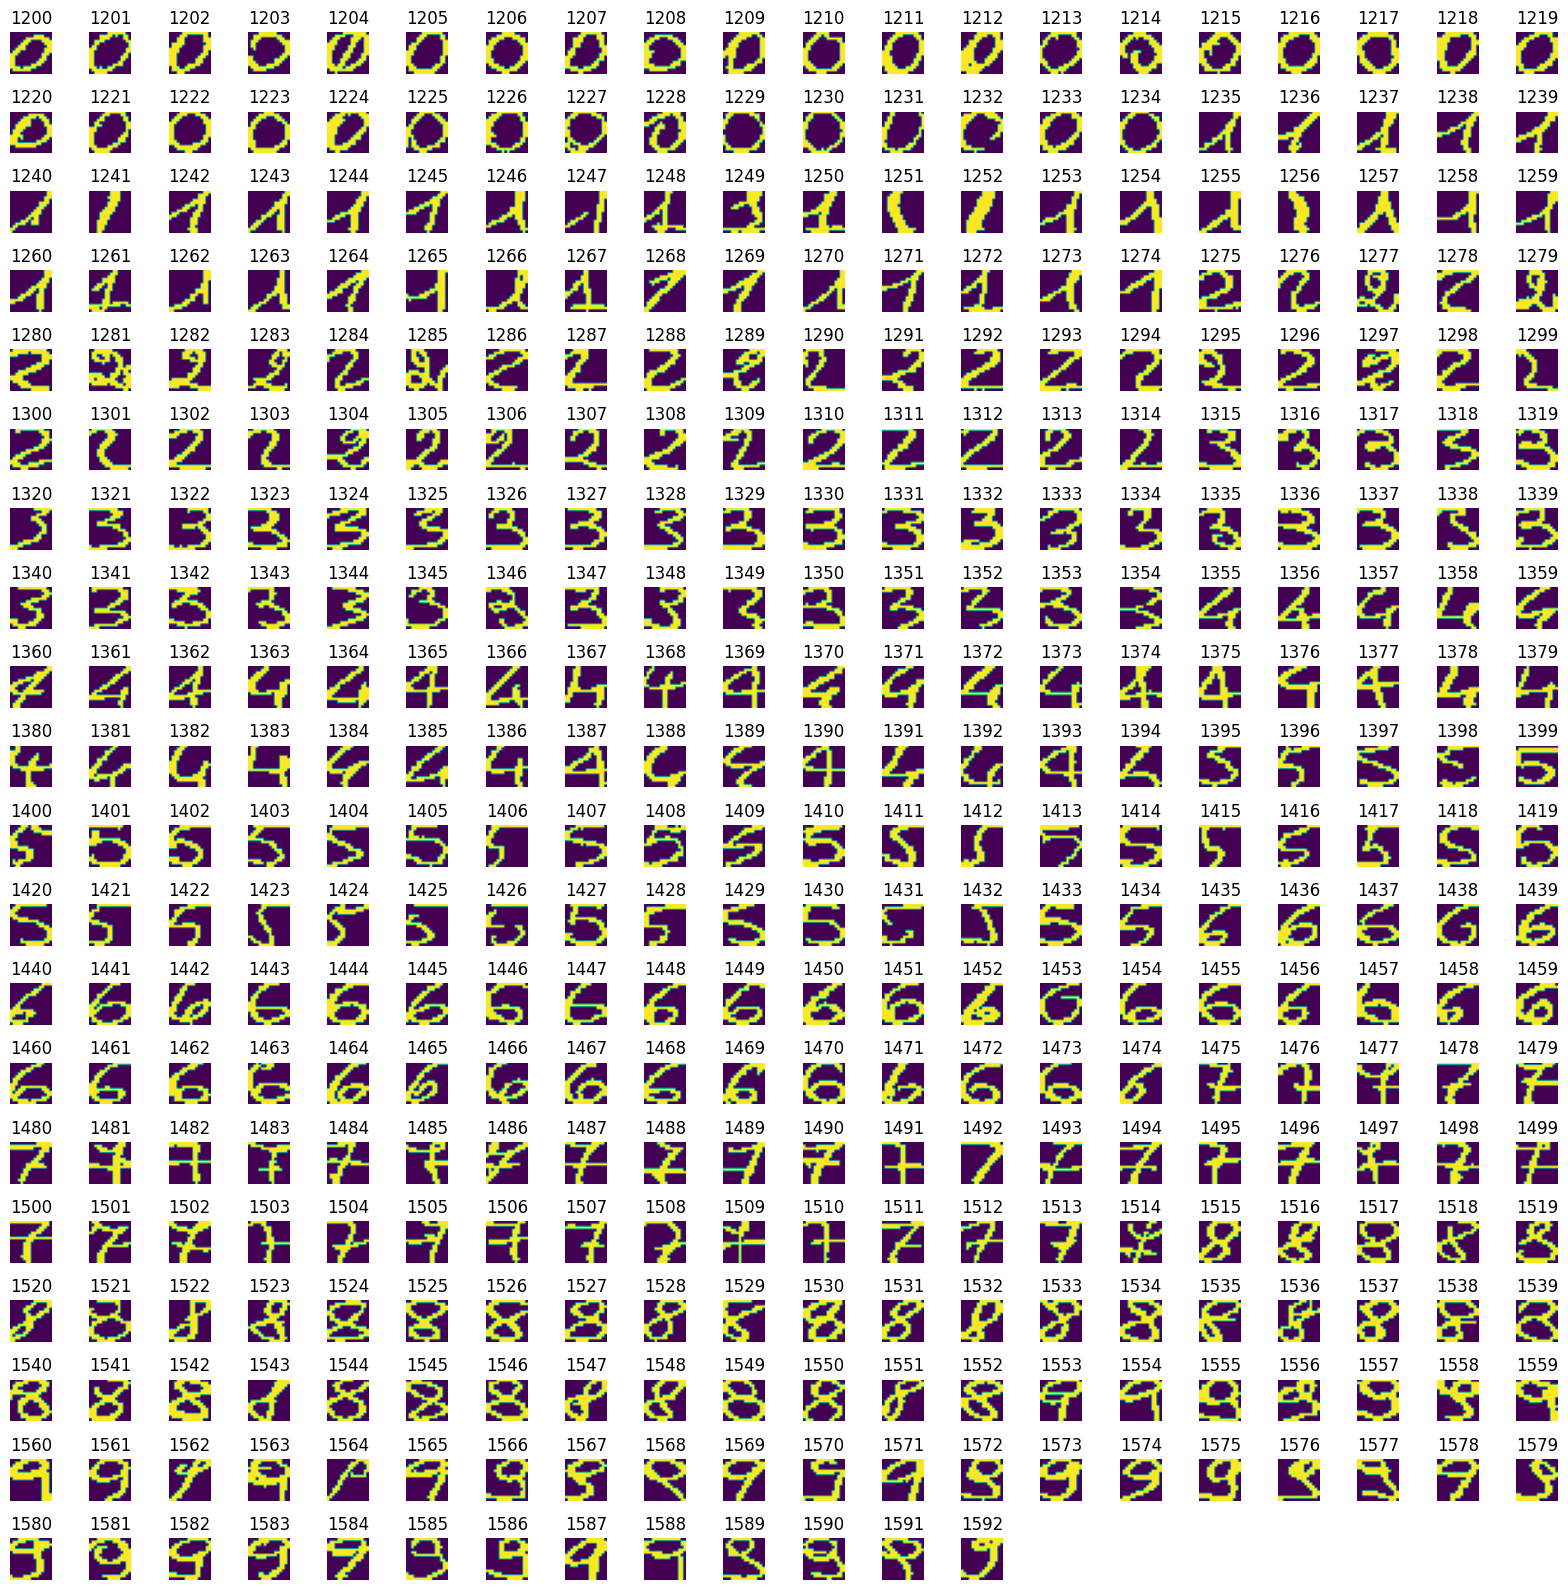

In [7]:
fig = plt.figure(figsize=(16, 16))

columns = 20
rows = 20
for i in range(1200, 1593):
    img = imgdata[i]
    ax = fig.add_subplot(rows, columns, i-1199)
    ax.imshow(img)
    ax.set_axis_off()
    ax.set_title(i)
plt.tight_layout()
plt.show()

In [8]:
toDelete = [1553, 1554, 1116, 1155]

for c in range(2):
    for i in range(10):
        for n in range(40):
            if np.isin(counter, toDelete) :
                counter = counter + 1
            elif (counter == 835):
                gt = np.append(gt, i)
                gt = np.append(gt, i)
                counter = counter + 2
            else:
                gt = np.append(gt, i)
                counter = counter + 1

gt.shape

(1593,)

In [9]:
from sklearn.model_selection import train_test_split

Y = gt
X = imgdata.reshape(imgdata.shape[0], imgdata.shape[1]*imgdata.shape[2])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Save the NumPy array to an npy file
np.save('semeionTrainpics_preprocessed.npy', Xtrain)
np.save('semeionTestpics_preprocessed.npy', Xtest)
np.save('semeionTrainGT_preprocessed.npy', Ytrain)
np.save('semeionTestGT_preprocessed.npy', Ytest)